# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

### Откройте файлы и изучите их.

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.dummy import DummyClassifier
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.dummy import DummyRegressor

In [2]:
train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
test=pd.read_csv('/datasets/gold_recovery_test_new.csv')
full=pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [5]:
train.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,14117.000000,14149.000000,14049.000000,14149.000000,14063.000000,13863.000000,14149.000000,14148.000000,14134.000000,14103.000000,14149.000000,14145.000000,14148.000000,14145.000000,14148.000000,14147.000000,14148.000000,14146.000000,14148.000000,1.414800e+04,14148.000000,14148.000000,14149.000000,14149.000000,14049.000000,14141.000000,14005.000000,14071.000000,14149.000000,14120.000000,14141.000000,14113.000000,13721.000000,14149.000000,14149.000000,14127.000000,14149.000000,14149.000000,14148.000000,14149.000000,14149.000000,14149.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14149.000000,14149.000000,13713.000000,14149.000000,14149.000000,14149.000000,14147.000000,14139.000000,12544.000000,14149.000000,13932.000000,14148.000000,14128.000000,14148.000000,14145.000000,14148.000000,14148.000000,14148.000000,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148

в обучающей выборке есть пропуски и целевые признаки

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [7]:
test.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5287.000000,5289.000000,5269.000000,5290.000000,5285.000000,5290.000000,5282.000000,5265.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5287.000000,5290.000000,5288.000000,5290.000000,5281.000000,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,1.544844e+03,-500.199527,9.371940,3.798082,489.800620,55.951097,37.716648,9.334682,13.855759,6.467745,13.922328,6.512103,1053.400166,-395.732530,1318.926879,-475.241428,1301.595477,-474.836671,1214.847960,-475.682272,1056.648995,-469.029688,997.949719,-470.482465,26.312630,-502.750897,21.949119,-501.987097,25.402926,-507.490314,2.098211e+01,-506.627916,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,1.247731e+02,31.045257,1.926264,0.954859,108.036326,19.081758,5.491415,1.619521,3.350852,1.065114,3.223769,0.886989,121.139309,91.085505,156.450366,45.649466,171.269667,45.859866,185.763319,47.844967,131.542839,59.325990,128.218869,60.759318,3.429852,28.756505,4.354961,34.582722,6.526457,47.620908,6.736179e+00,44.528673,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,4.039220e-32,-799.794250,0.568441,0.273677,0.002986,0.046369,1.393488,0.568632,0.001147,0.000568,0.000077,0.006985,-0.042069,-657.949759,-0.721806,-650.245277,-0.056636,-647.544439,-0.992219,-648.390665,-1.982295,-649.267537,-2.593390,-649.949283,0.20

В тестовой выборке меньшее количество столбцов и нет целевых признаков

In [8]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [9]:
full.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,19402.000000,19439.000000,19335.000000,19439.000000,19323.000000,19069.000000,19439.000000,19435.000000,19418.000000,19377.000000,19439.000000,1.943500e+04,19438.000000,1.943500e+04,19438.000000,1.943700e+04,19438.000000,1.943600e+04,19438.000000,1.943700e+04,19437.000000,19437.000000,19439.000000,19439.000000,19339.000000,19428.000000,19294.000000,19340.000000,19439.000000,19405.000000,19431.000000,19395.000000,18986.000000,19439.000000,19439.000000,19416.000000,19439.000000,19439.000000,19438.000000,19439.000000,19439.000000,19439.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19439.000000,19439.000000,19003.000000,19439.000000,19439.000000,19439.000000,19437.000000,19427.000000,17691.000000,19439.000000,19219.000000,19438.000000,19416.000000,19438.000000,19426.000000,19438.000000,19438.000000,19438.000000,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438

в полном датасете присутствуют все необходимые данные

### Проверка правильности расчета целевого признака

In [10]:
train['rougher.output.recovery'].mean()

82.70450164550293

In [11]:
C = train['rougher.output.concentrate_au']
F = train['rougher.input.feed_au']
T = train['rougher.output.tail_au']

In [12]:
recovery = ((C*(F-T))/(F*(C-T)))*100

In [13]:
recovery.mean()

82.70450164550293

среднее значение для расчетной эффективности и для эффективности в датасете равны, можно говорить о правильности расчета

In [14]:
mean_absolute_error(recovery, train['rougher.output.recovery'])

9.73512347450521e-15

MAE подтверждает, что данный показатель расчитан верно, можно переходить к следующему этапу

### Анализ признаков, которые отсутствуют в тестовой выборке.

In [15]:
a = set(train.columns) - set(test.columns)

In [16]:
a

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

в тестовой выборке отсутствуют признаки финальных концентраций в продукте, целевые признаки, финальные концентрации в хвостах, в продуктах на разных этапах очистки, расчетные концентрации после флотации в продукте и хвостах, предположительно данные столбцы не требуются для обучения модели из обучающей выборки.

### Предобработка данных.

Необходимо заполнить пропуски во всех датасетах, Предполагаю, что лучше это сделать по предыдущему значению, поскольку данные по времени не сильно отличаются и проверить после этого дубликаты\
Необходимо из обучающей выборки удалить столбцы которых нет в тестовой, перед этим выделив целевые признаки

In [17]:
test.fillna(method = 'ffill', inplace = True)
train.fillna(method = 'ffill', inplace = True)
full.fillna(method = 'ffill', inplace = True)

In [18]:
train.isna().sum()

date                                                  0
final.output.concentrate_ag                           0
final.output.concentrate_pb                           0
final.output.concentrate_sol                          0
final.output.concentrate_au                           0
final.output.recovery                                 0
final.output.tail_ag                                  0
final.output.tail_pb                                  0
final.output.tail_sol                                 0
final.output.tail_au                                  0
primary_cleaner.input.sulfate                         0
primary_cleaner.input.depressant                      0
primary_cleaner.input.feed_size                       0
primary_cleaner.input.xanthate                        0
primary_cleaner.output.concentrate_ag                 0
primary_cleaner.output.concentrate_pb                 0
primary_cleaner.output.concentrate_sol                0
primary_cleaner.output.concentrate_au           

удаление столбцов проведу позже

При изучении данных датасетов были сделаны следующие выводы:\
В тестовой и обучающей выборке присутствуют пропуски(заполнены по предыдущему значению)\
Расчет эффективности обогащения рассчитан верно(проверено по среднему значению и метрикой МАЕ)\
в тестовой выборке отсутствуют признаки финальных концентраций в продукте, целевые признаки, финальные концентрации в хвостах, в продуктах на разных этапах очистки, расчетные концентрации после флотации в продукте и хвостах, предположительно данные столбцы не требуются для обучения модели из обучающей выборки и их необходимо удалить перед обечением.\
В тестовой выборке отсутствуют целевые признаки, необходимо выделить их из полного датасета, проводя поиск по дате. 

## Анализ данных

### Изменение концентрации металлов (Au, Ag, Pb) на различных этапах очистки

В данном пункте необходимо проанализировать концентрацию на следующих этапах очистки:\
1. Исходное сырье (rougher.input.feed_au )
2. Флотация(rougher.output.concentrate_au) 
3. Первый этап очистки (primary_cleaner.output.concentrate_au)
4. Второй этап очистки (final.output.concentrate_au)

In [19]:
au = pd.DataFrame()
au['Исходное сырье'] = train['rougher.input.feed_au']
au['Флотация'] = train['rougher.output.concentrate_au']
au['Первый этап очистки'] = train['primary_cleaner.output.concentrate_au']
au['Второй этап очистки'] = train['final.output.concentrate_au']

In [20]:
au.head(10)

,Исходное сырье,Флотация,Первый этап очистки,Второй этап очистки
0,6.486150,19.793808,34.174427,42.192020
1,6.478583,20.050975,34.118526,42.701629
2,6.362222,19.737170,33.969464,42.657501
3,6.118189,19.320810,28.260743,42.689819
4,5.663707,19.216101,33.044932,42.774141
5,5.687168,18.950385,32.070664,41.633678
6,6.038436,19.319591,33.184823,41.995316
7,6.433854,19.507897,34.027719,42.452727
8,6.526612,19.789465,34.964974,43.404078
9,6.633002,19.497669,34.826500,43.235220


In [21]:
ag = pd.DataFrame()
ag['Исходное сырье'] = train['rougher.input.feed_ag']
ag['Флотация'] = train['rougher.output.concentrate_ag']
ag['Первый этап очистки'] = train['primary_cleaner.output.concentrate_ag']
ag['Второй этап очистки'] = train['final.output.concentrate_ag']

In [22]:
ag.head(10)

,Исходное сырье,Флотация,Первый этап очистки,Второй этап очистки
0,6.100378,11.500771,8.547551,6.055403
1,6.161113,11.615865,8.558743,6.029369
2,6.116455,11.695753,8.603505,6.055926
3,6.043309,11.915047,7.221879,6.047977
4,6.060915,12.411054,9.089428,6.148599
5,5.801920,11.985584,9.553724,6.482968
6,6.056253,11.684307,8.968869,6.533849
7,5.955053,11.182624,8.545238,6.130823
8,5.878084,11.051323,8.046686,5.834140
9,5.908793,11.116297,8.098985,5.687063


In [23]:
pb = pd.DataFrame()
pb['Исходное сырье'] = train['rougher.input.feed_pb']
pb['Флотация'] = train['rougher.output.concentrate_pb']
pb['Первый этап очистки'] = train['primary_cleaner.output.concentrate_pb']
pb['Второй этап очистки'] = train['final.output.concentrate_pb']

In [24]:
pb.head(10)

,Исходное сырье,Флотация,Первый этап очистки,Второй этап очистки
0,2.284912,7.101074,10.389648,9.889648
1,2.266033,7.278807,10.497069,9.968944
2,2.159622,7.216833,10.354494,10.213995
3,2.037807,7.175616,8.496563,9.977019
4,1.786875,7.240205,9.986786,10.142511
5,1.879351,7.121903,9.816215,10.049416
6,2.105501,7.304849,10.081306,10.058141
7,2.310432,7.258496,10.224540,9.935481
8,2.391713,7.380043,10.500065,10.071156
9,2.440899,7.297363,10.525324,9.980404


Text(0.5, 0, 'Стадии очистки')

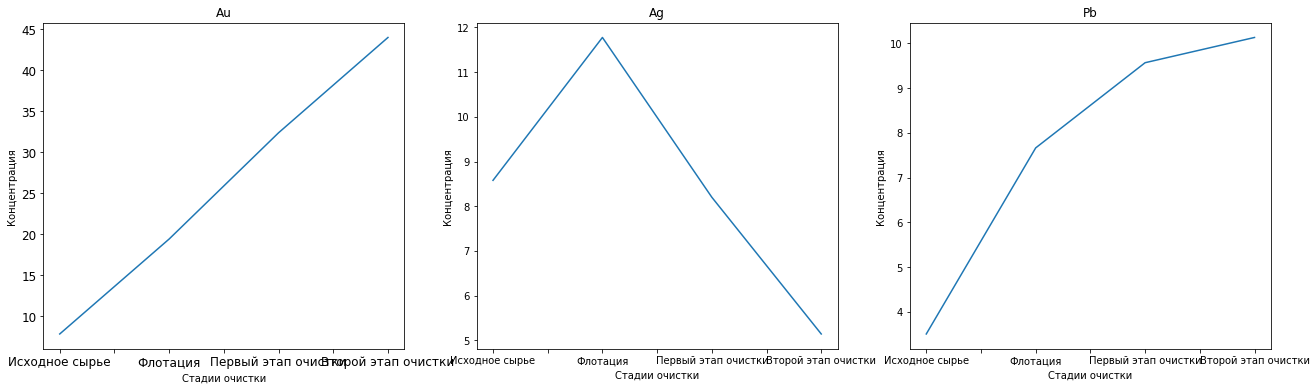

In [25]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, linewidth=3, figsize=(22, 6))
au.mean().plot(ax=ax1, subplots=True, fontsize=12)
ax1.set_title('Au')
ax1.set_ylabel('Концентрация')
ax1.set_xlabel('Стадии очистки')

ag.mean().plot(ax=ax2, subplots=True)
ax2.set_title('Ag')
ax2.set_ylabel('Концентрация')
ax2.set_xlabel('Стадии очистки')

pb.mean().plot(ax=ax3, subplots=True)
ax3.set_title('Pb')
ax3.set_ylabel('Концентрация')
ax3.set_xlabel('Стадии очистки')

В ходе изучения графиков можно отметить постепенное увеличение концетрации золота, снижение концентрации серебра, и увеличение свинца

###  Изучение распределения размеров гранул сырья

на данном этапе изучим распределение столбца "rougher.input.feed_size" на тестовой и обучающей выборке

count    5290.000000
mean       55.952754
std        19.080334
min         0.046369
25%        43.906504
50%        50.846843
75%        62.451165
max       392.494040
Name: rougher.input.feed_size, dtype: float64

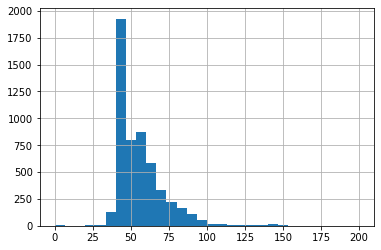

In [26]:
test['rougher.input.feed_size'].hist(bins = 30, range= (0,200))
test['rougher.input.feed_size'].describe()

count    14149.000000
mean        60.239856
std         23.005310
min          9.659576
25%         48.966751
50%         55.269784
75%         66.007526
max        484.967466
Name: rougher.input.feed_size, dtype: float64

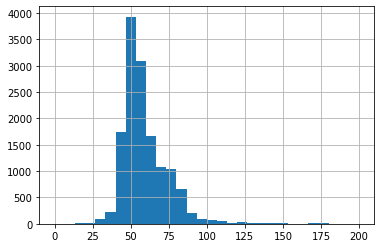

In [27]:
train['rougher.input.feed_size'].hist(bins = 30, range= (0,200))
train['rougher.input.feed_size'].describe()

Распределения нормальные приблизительно одинаковые, среднее по тестовой выборке 50,8 по обучающей 55. идем дальше, все норм

### Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах

In [28]:
sum_con = pd.DataFrame()
sum_con['Исходное_сырье'] = train['rougher.input.feed_pb'] + train['rougher.input.feed_ag'] + train[
    'rougher.input.feed_au'] + train['rougher.input.feed_sol']

sum_con['черновой_концентрат'] = train['rougher.output.concentrate_pb'] + train['rougher.output.concentrate_ag'] + train[
    'rougher.output.concentrate_au'] + train['rougher.output.concentrate_sol']

sum_con['Финальный_концентрат'] = train['final.output.concentrate_ag'] + train['final.output.concentrate_pb'] + train[
    'final.output.concentrate_au'] + train['final.output.concentrate_sol']

In [29]:
sum_con.head()

,Исходное_сырье,черновой_концентрат,Финальный_концентрат
0,51.680034,66.424950,63.644396
1,50.659114,67.012710,63.957723
2,50.609929,66.103793,64.311180
3,51.061546,65.752751,63.573449
4,47.859163,65.908382,64.004667


array([[<AxesSubplot:title={'center':'Исходное_сырье'}>,
        <AxesSubplot:title={'center':'черновой_концентрат'}>],
       [<AxesSubplot:title={'center':'Финальный_концентрат'}>,
        <AxesSubplot:>]], dtype=object)

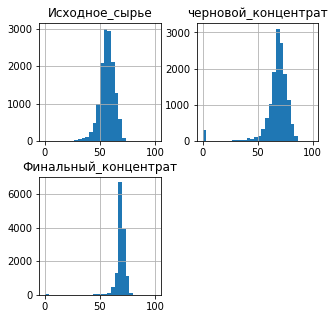

In [30]:
sum_con.hist(bins = 30, range= (0,100), figsize=(5, 5))

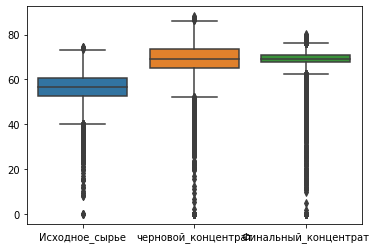

In [31]:
sns.boxplot(data = sum_con)
sns.set(rc={'figure.figsize':(5,5)})

Видны ошибки в данных, концентрация основных элементов руды не может ровняться "0". предположительно это ошибки оборудования или ввода данных. предположительно эти данные лучше удалить. 

Для обучения в тренировочной выборке необходимо удалить данные которых нет в тестовой, выделить таргет, удалить выпадающие ошибки по ящику с усами (менее 10)

### Подготовка данных

In [32]:
drop1 = sum_con.query(('Финальный_концентрат < 10') or ('черновой_концентрат < 10') or ("Финальный концентрат < 10"))

In [33]:
drop1.index

Int64Index([  644,  1193,  1194,  1195,  1196,  1243,  1682,  2019,  2020,
             2236,  3394,  3395,  3396,  3397,  3400,  4215,  4314,  4564,
             4652,  4653,  4722,  4723,  4724,  4965,  4966,  4967,  4968,
             4969,  5139,  5140,  5784,  5871,  5872,  6016,  6017,  6018,
             6019,  6254,  6430,  7050,  7051,  7052,  7053,  7054,  7406,
             7518,  7519,  7556,  8665,  8884,  8898,  8899,  8900,  8919,
             8920,  9320,  9893,  9894, 10020, 12277, 13863, 13919],
           dtype='int64')

In [34]:
train = train.drop(index = drop1.index, axis = 0)

In [35]:
train.head(10)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

In [36]:
target_train_r = train['rougher.output.recovery']
target_train_f = train['final.output.recovery']


In [37]:
train = train.drop((a), axis = 1)

In [38]:
train = train.drop(['date'], axis = 1)

In [39]:
full_target = full[['date', 'rougher.output.recovery', 'final.output.recovery']]

In [40]:
test = test.merge(full_target, how = 'left', on = 'date')

In [41]:
target_test_r = test['rougher.output.recovery']
target_test_f = test['final.output.recovery']
test = test.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis = 1);

In [42]:
train_r = train.filter(regex='^rougher',axis=1)
test_r = test.filter(regex='^rougher',axis=1)

На данном этапе мы имеем следующие датасеты:
1. train - обучающая выборка с финальным концентратом
2. target_train_f - целевой признак для выборки с финальным концентратом
3. train_r  - обучающая выборка для чернового концентрата
4. target_train_r - целевой признак для выборки с черновым концентратом


При анализе данных были сделаны следующие выводы: \
В ходе изучения графиков изменения концентрации основных элементов (Au, Ag, Pb) можно отметить постепенное увеличение концентрации золота, снижение концентрации серебра, и увеличение концентрации свинца от изначального сырья к финальному концентрату\
Распределения размеров частиц нормальные, приблизительно одинаковые, средний размер частиц по тестовой выборке 50,8 по обучающей 55.\
В данных имеются ошибки, суммарная концентрация основных элементов руды не может ровняться "0" на всех этапах очистки, необходимо удалить ошибочные значения.\
Для обучения в тренировочной выборке необходимо было удалить данные, которых нет в тестовой, выделить таргет, удалить выпадающие ошибки по ящику с усами (менее 10)


## Модель

### Напишите функцию для вычисления итоговой sMAPE.

In [43]:
def smape(target1, predict1, target2, predict2):
    smape1 = (abs(target1 - predict1) / ((abs(target1) + abs(predict1))/2)*100).mean()
    smape2 = (abs(target2 - predict2) / ((abs(target2) + abs(predict2))/2)*100).mean()
    return (smape1*0.25 +smape2 * 0.75)

### Обучение моделей

In [44]:
for i in range(1,15):
    model = DecisionTreeRegressor(random_state=12345, max_depth = i)
    predictions_r = cross_val_predict(model, train_r, target_train_r, cv=3)
    predictions_f = cross_val_predict(model, train, target_train_f, cv=3)
    print("max_depth =", i, ": ", end='')
    print(smape(target_train_r, predictions_r, target_train_f, predictions_f))

max_depth = 1 : 11.021144783921311
max_depth = 2 : 11.424714164531625
max_depth = 3 : 12.68527603683819
max_depth = 4 : 12.343803041763367
max_depth = 5 : 13.195530664747627
max_depth = 6 : 12.607172919032156
max_depth = 7 : 13.221242472330292
max_depth = 8 : 13.83968757422215
max_depth = 9 : 14.328934892460646
max_depth = 10 : 14.545153502074282
max_depth = 11 : 15.926265042247788
max_depth = 12 : 16.124235776101756
max_depth = 13 : 16.388516374368354
max_depth = 14 : 17.148714169943883


In [45]:
model = LinearRegression()
predictions_r = cross_val_predict(model, train_r, target_train_r, cv=5)
predictions_f = cross_val_predict(model, train, target_train_f, cv=5)
print(smape(target_train_r, predictions_r, target_train_f, predictions_f))

11.353914245857172


In [46]:
best_est = 0
best_depth = 0
best_result = 100
for est in range(10, 50, 10):
    for depth in range (1, 10):
        model = RandomForestRegressor(random_state=12345,
                                       n_estimators=est, 
                                       max_depth=depth)
        predictions_r = cross_val_predict(model, train_r, target_train_r, cv=5)
        predictions_f = cross_val_predict(model, train, target_train_f, cv=5)
        result = smape(target_train_r, predictions_r, target_train_f, predictions_f)
        if result < best_result:
            best_model = model
            best_est = est
            best_result = result
            best_depth = depth
print("Метрики качества", best_result, "Количество деревьев:", best_est, "Максимальная глубина:", best_depth)


Метрики качества 9.717723092527304 Количество деревьев: 40 Максимальная глубина: 4


В качесве лучшей модели для обучения была выбрана модель случайного леса с гиперпараметрами Количество деревьев: 40 Максимальная глубина: 4

### Проверка модели на тестовой выборке

In [47]:
model = RandomForestRegressor(random_state=12345,
                                       n_estimators=40, max_depth=4)
model.fit(train_r, target_train_r) 
predictions_r = model.predict(test_r)
model.fit(train, target_train_f) 
predictions_f = model.predict(test)
result = smape(target_test_r, predictions_r, target_test_f, predictions_f)

In [48]:
result

9.631918735422648

На тестовой выборке получены хорошие результаты, необходимо проверить на адекватность

In [49]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(train_r, target_train_r) 
predictions_r2 = dummy_regr.predict(test_r)
dummy_regr.fit(train, target_train_f) 
predictions_f2 = dummy_regr.predict(test)
result2 = smape(target_test_r, predictions_r2, target_test_f, predictions_f2)

In [50]:
result2

10.160338674793685

Наша модель предсказывает лучшее значение метрики sMAPE случайной по среднему значению модели. 

В ходе подбора модели были проанализированы следующие модели: линейная регрессия, случайный лес и дерево решений. Сравнение проводили по метрике  sMAPE. Наименьшее значение метрики (9,63) получила модель случайного леса с гиперпараметрами Количество деревьев: 40 Максимальная глубина: 4. Модель проверена на адекватность.

1. При изучении данных датасетов были сделаны следующие выводы:
В тестовой и обучающей выборке присутствуют пропуски(заполнены по предыдущему значению)\
Расчет эффективности обогащения рассчитан верно(проверено по среднему значению и метрикой МАЕ\)
в тестовой выборке отсутствуют признаки финальных концентраций в продукте, целевые признаки, финальные концентрации в хвостах, в продуктах на разных этапах очистки, расчетные концентрации после флотации в продукте и хвостах, предположительно данные столбцы не требуются для обучения модели из обучающей выборки и их необходимо удалить перед обечением.\
В тестовой выборке отсутствуют целевые признаки, необходимо выделить их из полного датасета, проводя поиск по дате.\ 
2. При анализе данных были сделаны следующие выводы: 
В ходе изучения графиков изменения концентрации основных элементов (Au, Ag, Pb) можно отметить постепенное увеличение концентрации золота, снижение концентрации серебра, и увеличение концентрации свинца от изначального сырья к финальному концентрату\
Распределения размеров частиц нормальные, приблизительно одинаковые, средний размер частиц по тестовой выборке 50,8 по обучающей 55.\
В данных имеются ошибки в концентрациях элеменов, суммарная концентрация основных элементов руды не может ровняться "0" на всех этапах очистки, необходимо удалить ошибочные значения(удалены).\
Для обучения в тренировочной выборке удалены данные, которых нет в тестовой, был выделен таргет, удалены выпадающие ошибки по ящику с усами (менее 10)\
3. подбор модели 
В ходе подбора модели были проанализированы следующие модели: линейная регрессия, случайный лес и дерево решений. Сравнение проводили по метрике  sMAPE. Наименьшее значение метрики (9,63) получила модель случайного леса с гиперпараметрами Количество деревьев: 40 Максимальная глубина: 4. Модель проверена на адекватность.
